<font size="5" color="green" align="center"><b>Project1: Customer Segmentation Analysis  </b></font><br>


<font size="4" color="purple" align="center"><b>Introduction</b></font><br>

Welcome to the Customer Segmentation Analysis project. In this project, we will explore a dataset containing customer information and purchase history to identify distinct customer segments. The goal of customer segmentation is to divide the customer base into groups that share similar characteristics, which can be leveraged to tailor marketing strategies, enhance customer satisfaction, and optimize business decisions.<br>

<font size="4" color="purple" align="center"><b>Customer Segmentation</b></font><br>

Customer segmentation is a crucial component of modern marketing strategies. By analyzing customer behavior, demographics, and purchasing patterns, businesses can:

Identify distinct customer segments.
Personalize marketing campaigns for specific customer groups.
Improve customer retention and satisfaction by catering to specific needs.
Optimize product offerings and pricing strategies based on segment preferences.
Enhance overall business strategies by understanding different customer groups.
Through this analysis, we aim to gain a deeper understanding of the customer base, which will allow us to make more informed, data-driven decisions.

<font size="4" color="purple" align="center"><b>About the dataset</b></font><br>
The dataset used in this analysis includes customer demographic information, purchase history, and other relevant features. This data provides a comprehensive view of customer behavior, allowing us to explore various aspects of purchasing patterns, customer loyalty, and overall engagement with the company.  Dataset: (<a href="https://www.kaggle.com/datasets/bolotnurmamatov/i-food">link</a>)<br>
The dataset will be instrumental in generating insights that can drive targeted marketing and business strategies.

<b> Key Concepts and Challenges </b>
1. Data Collection: Obtain a dataset with customer information and purchase history.
2. Data Exploration and Cleaning: Understand the dataset's structure and address any inconsistencies or missing data.
3. Descriptive Statistics: Calculate metrics like average purchase value and purchase frequency.
4. Customer Segmentation: Use clustering algorithms (e.g., K-means) to segment customers based on their behavior.
5. Visualization: Create scatter plots, bar charts, and other visualizations to represent customer segments.
6. Insights and Recommendations: Analyze each segment's characteristics and provide actionable insights.


<b>IMPORTING REQUIRED LIBRARY</B>

In [9]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

from sklearn.cluster import KMeans # Import KMeans algorithm for clustering
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature normalization

import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For statistical data visualization

<font size="4" color="darkblue" align="center"><b>1. Data Collection</b></font><b></b>

In [10]:
# Load the dataset
df = pd.read_csv('ifood_df.csv')

# Display the first few rows of the dataset
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


<font size="4" color="darkblue" align="center"><b>2. Data Exploration and Cleaning</b></font><b></b>

In [11]:
# Show the dimensions of the DataFrame
df.shape

(2205, 39)

In [12]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [13]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

<b>Dataset Summary</b>

* Entries: 2205
* Columns: 39
* Data Types: Float64: 1 column (Income) and Int64: 38 columns

<b>Insights:</b>
* Complete Data: No missing values in any column.
* Data Types: Predominantly integers with one floating-point column, suitable for analysis and modeling.

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


There are no missing values in the dataset.

#### 2.1  Identify outllier on Total Amount

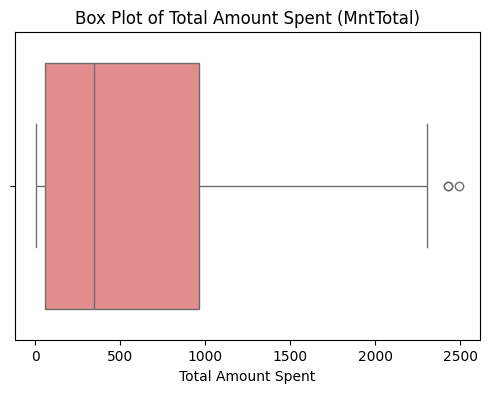

In [15]:
# Create a box plot to identify outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['MntTotal'], color='lightcoral')
plt.title('Box Plot of Total Amount Spent (MntTotal)')
plt.xlabel('Total Amount Spent')
plt.show()

Outlier: The box plot spotted a few outliers in the MntTotal. Let's take a closer look at the outliers.

In [22]:
# Calculate quartiles and IQR
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_new = df[(df['MntTotal'] >= lower_bound) & (df['MntTotal'] <= upper_bound)]



In [23]:
# Print the number of rows before and after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_new.shape}")

Original DataFrame shape: (2205, 39)
Cleaned DataFrame shape: (2202, 39)


In [24]:
df = df_new

#### 2.2  Visual Representation of Income Using a Histogram and Outlier Detection

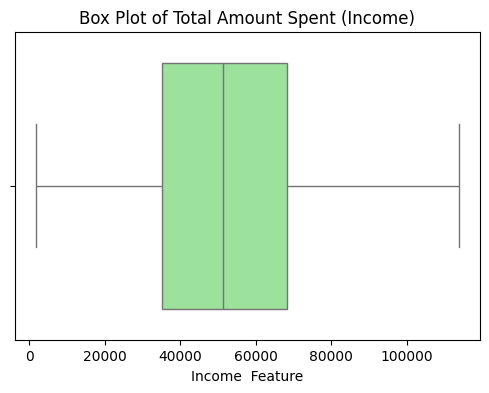

In [25]:
# Create a box plot to identify outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Income'], color='lightgreen')
plt.title('Box Plot of Total Amount Spent (Income)')
plt.xlabel('Income  Feature')
plt.show()

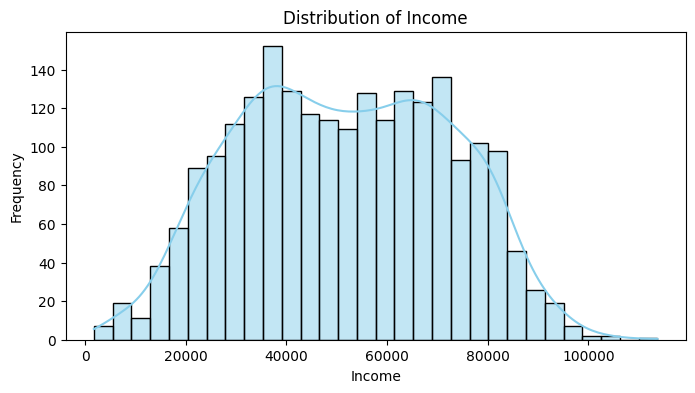

In [26]:
# Plot histogram of 'Income'
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The income distribution approximates a normal distribution, and there are no significant outliers.

In [27]:
print("Skewness: %f" % df['Age'].skew())
print("Kurtosis: %f" % df['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


* Skewness (0.091): The age distribution is nearly symmetric.
* Kurtosis (-0.796): The age distribution is flatter than a normal distribution.

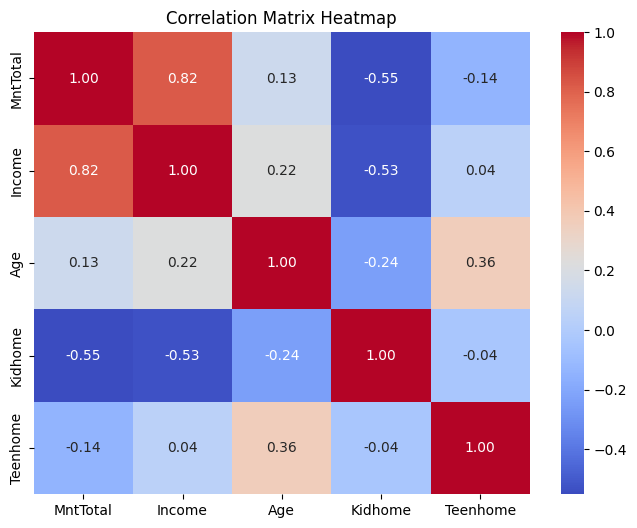

In [29]:
# Define columns of interest
cols = ['MntTotal', 'Income', 'Age', 'Kidhome', 'Teenhome']

# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


<b>The heatmap Summary:</b>

* MntTotal and Income have a strong positive correlation (0.82), meaning higher income leads to higher spending.
* MntTotal and Teenhome have a moderate negative correlation (-0.4), suggesting that households with more teenagers spend less overall.







<font size="4" color="darkblue" align="center"><b>3. Descriptive Statistics</b></font><b></b>

In [30]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


In [31]:
# Calculate average purchase value
avg_purchase_value = df['MntTotal'].mean()

# Calculate purchase frequency (assuming there's a CustomerID column)
# If CustomerID is not available, calculate based on overall transaction counts or specific product categories
purchase_frequency = df[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].sum(axis=1)

# Display calculated metrics
print(f"Average Purchase Value: {avg_purchase_value}")
print(f"Purchase Frequency (Summary Stats):")
print(purchase_frequency.describe())


Average Purchase Value: 560.19391462307
Purchase Frequency (Summary Stats):
count    2202.000000
mean       12.558583
std         7.176459
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
dtype: float64


<b>Insights:</b>

* Customers typically spend around $562.76.
* Average purchase frequency is about 12.57, with significant variability.
* Action: Target strategies to increase purchase frequency among low-frequency customers and engage high-frequency customers.

<font size="4" color="darkblue" align="center"><b>4. Customer Segmentation</b></font><b></b>

<b>4.1 Elbow Method</b>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

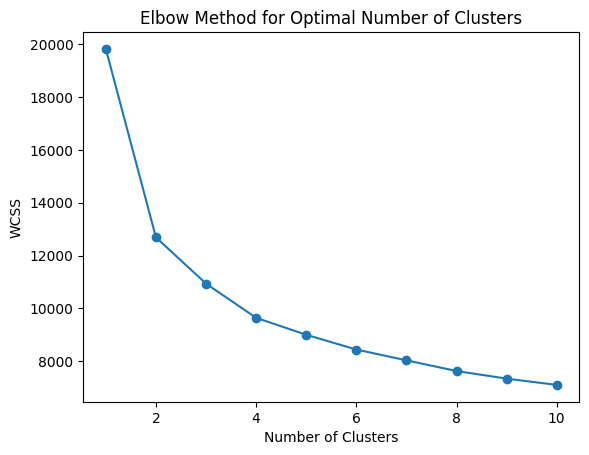

In [32]:
# Select relevant features for clustering
features = df[['Income', 'MntTotal', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'Age', 'Kidhome', 'Teenhome', 'Recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):  # Check between 1 and 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the results to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

<b>2. Silhouette Score</b>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

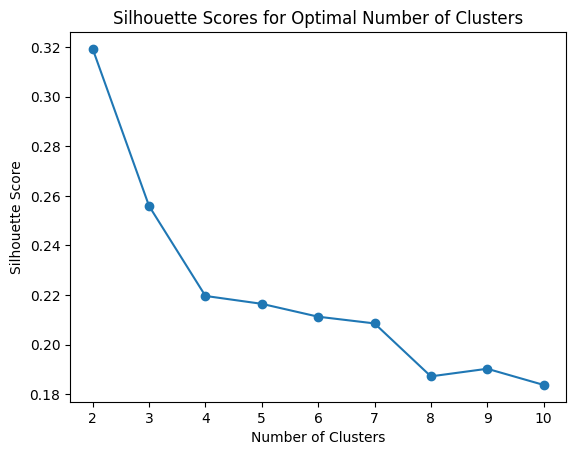

In [33]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters as silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results to find the best number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.show()

The optimal number of clusters, as determined by both the Elbow Method and the Silhouette Score, is 4 clusters.

In [34]:
# Optimal number of clusters determined from the Elbow Method
optimal_clusters = 4  # Replace this with the optimal number of clusters

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[ 1.1780355   1.34626041  0.78453316  0.34326848  1.24833369 -0.00263089
  -0.71755382 -0.81251498  0.04723264]
 [-1.04236865 -0.81383293 -0.79570238 -0.62496077 -0.73812468 -0.79275395
   0.74361529 -0.93195073 -0.0039977 ]
 [-0.50727168 -0.7914381  -0.69807205 -0.65419145 -0.6929429   0.42191028
   0.57015871  0.89452907  0.02353303]
 [ 0.43354982  0.3044151   0.70857849  0.89532151  0.22958904  0.42386533
  -0.6036231   0.87368499 -0.05922336]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<b>Step for the above:</b><br>
* Feature Selection: Choose relevant columns for clustering.
* Standardization: Normalize feature values to ensure uniform influence.
* K-means Clustering: Cluster the data into specified groups based on standardized features.
* Cluster Centroids: Output the average feature values for each cluster to understand cluster characteristics.

This process helps in segmenting customers into distinct groups based on their behaviors and attributes, which can be used for targeted marketing, personalized recommendations, and more.

<b>Summary of K-means Clustering Results</b>
<b>Cluster Centroids:</b>

The centroids represent the mean feature values for each cluster after standardization:

Cluster Centroids:
[[ 0.4318, 0.2987, 0.7075, 0.8958, 0.2297, 0.4239, -0.6030, 0.8751, -0.0558]
 [-0.5089, -0.7906, -0.6995, -0.6545, -0.6937, 0.4237, 0.5714, 0.8959, 0.0240]
 [ 1.1772, 1.3450, 0.7844, 0.3404, 1.2446, -0.0093, -0.7170, -0.8153, 0.0424]
 [-1.0432, -0.8129, -0.7971, -0.6253, -0.7388, -0.7891, 0.7449, -0.9308, -0.0036]]

* Cluster 1: Moderate spending and recent purchases.
* Cluster 2: Lower spending with more family-oriented features.
* Cluster 3: High spending and recent activity.
* Cluster 4: Lower engagement but higher physical and catalog purchases.

<font size="4" color="darkblue" align="center"><b>5. Visualization</b></font><b></b>

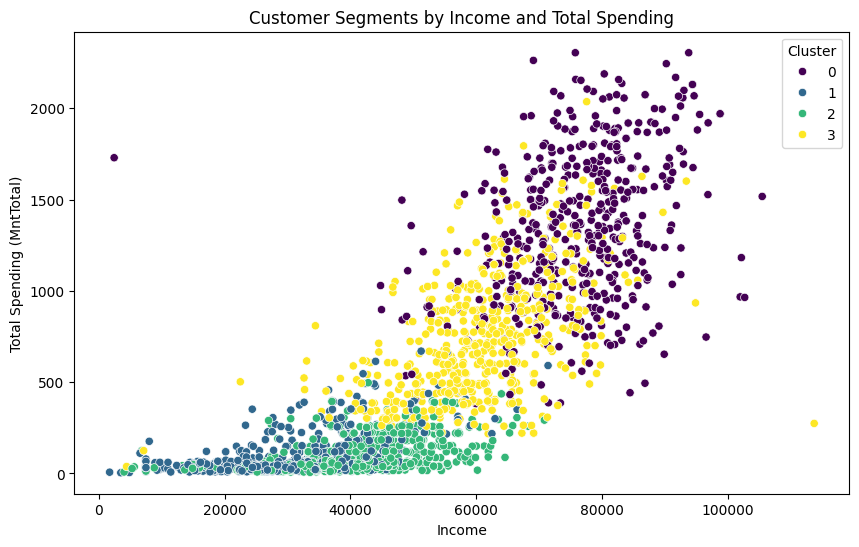

In [35]:
# Scatter plot of Income vs. MntTotal colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments by Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending (MntTotal)')
plt.show()

<b>Insight:</b>

* The plot helps in understanding how each customer segment differs in terms of income and spending.
* Clusters may show distinct patterns, indicating varying customer behaviors and spending habits.

<ipython-input-36-8d89ba63b778>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Cluster', data=df, palette=palette)


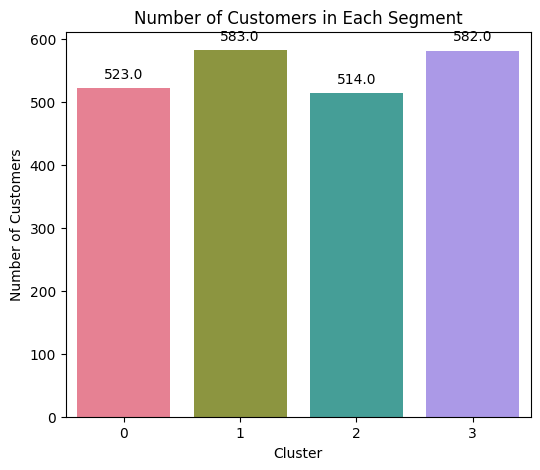

In [36]:
# Create a color palette with different colors for each cluster
palette = sns.color_palette("husl", len(df['Cluster'].unique()))

# Create the bar chart of cluster sizes
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Cluster', data=df, palette=palette)

# Add data values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Customers in Each Segment')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


<b>Insights:</b>

Cluster Sizes:
* Cluster 0: 583 customers
* Cluster 1: 514 customers
* Cluster 2: 525 customers
* Cluster 3: 583 customers

<b>Distribution: </b>Clusters 0 and 3 have the largest number of customers, indicating these segments are the most populous. Cluster 1 is slightly smaller, and Cluster 2 is close in size to Cluster 1.<br>
<b>Implication: </b>The bar chart reveals the relative sizes of customer segments, which can inform resource allocation, targeted marketing strategies, and business decisions.

<font size="4" color="darkblue" align="center"><b>6. Insights and Recommendations</b></font><b></b>

<b>Analyze characteristics of each segment and write Insights</b>

In [37]:
# Analyze characteristics of each segment and write Insights

# Analyze each cluster's characteristics
cluster_analysis = df.groupby('Cluster').mean()

# Recommendations based on cluster analysis
for cluster in cluster_analysis.index:
    print(f"Cluster {cluster} Analysis:")
    print(cluster_analysis.loc[cluster])
    print("\nRecommendations:")
    # Example recommendations based on average purchase value
    if cluster_analysis.loc[cluster, 'MntTotal'] > avg_purchase_value:
        print("- Target this segment with premium product offers.\n")
    else:
        print("- Consider discounts or promotions to increase engagement.\n")

Cluster 0 Analysis:
Income                  75925.864245
Kidhome                     0.057361
Teenhome                    0.065010
Recency                    50.388145
MntWines                  647.751434
MntFruits                  62.789675
MntMeatProducts           459.889101
MntFishProducts            95.152964
MntSweetProducts           64.627151
MntGoldProds               74.478011
NumDealsPurchases           1.177820
NumWebPurchases             5.040153
NumCatalogPurchases         6.128107
NumStorePurchases           8.359465
NumWebVisitsMonth           2.850860
AcceptedCmp3                0.089866
AcceptedCmp4                0.139579
AcceptedCmp5                0.275335
AcceptedCmp1                0.223709
AcceptedCmp2                0.036329
Complain                    0.003824
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.311663
Age                        51.093690
Customer_Days            2513.827916
marital_Divorced  